In [2]:
#import tools as tl
import lab1.bit_array_tools as bat
import lab1.channel as channel
import lab1.generic_coder as gc
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# Create the coders

In [4]:
none_encode_matrix = np.array([[1, 0, 0, 0],  # b1
                               [0, 1, 0, 0],  # b2
                               [0, 0, 1, 0],  # b3
                               [0, 0, 0, 1]]) # b4
                               #b1 b2 b3 b4
    
hamming_encode_matrix = np.array([[1, 0, 0, 0, 1, 1, 1],  # b1
                                  [0, 1, 0, 0, 1, 0, 1],  # b2
                                  [0, 0, 1, 0, 1, 1, 0],  # b3
                                  [0, 0, 0, 1, 0, 1, 1]]) # b4
                                  # b1 b2 b3 b4 p1 p2 p3
    
our_encode_matrix = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],  # b1
                              [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],  # b2
                              [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],  # b3
                              [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],  # b4
                              [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],  # b5
                              [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1],  # b6  
                              [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1],  # b7
                              [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]]) # b8
                             # b1 b2 b3 b4 b5 b6 b7 b8 p1 p2 p3 p4 p5 p6

    
none_coder = gc.GenericParityBitBlockCoder(none_encode_matrix)
hamming_coder = gc.GenericParityBitBlockCoder(hamming_encode_matrix)
our_coder = gc.GenericParityBitBlockCoder(our_encode_matrix)

# LAB 1

## Hamming Code

Initiate process:
p = 0.5        (T:0.3337 s)
p = 0.31802    (T:0.2943 s)
p = 0.202273   (T:0.2939 s)
p = 0.128653   (T:0.2489 s)
p = 0.0818286  (T:0.2771 s)
p = 0.0520462  (T:0.3047 s)
p = 0.0331034  (T:0.2471 s)
p = 0.0210551  (T:0.2608 s)
p = 0.0133918  (T:0.2737 s)
p = 0.00851774 (T:0.2663 s)
p = 0.00541761 (T:0.2825 s)
p = 0.00344581 (T:0.2558 s)
p = 0.00219167 (T:0.2341 s)
p = 0.00139399 (T:0.2695 s)
p = 0.000886631 (T:0.253 s)
p = 0.000563932 (T:0.2561 s)
p = 0.000358683 (T:0.2186 s)
p = 0.000228136 (T:0.2401 s)
p = 0.000145104 (T:0.2303 s)
p = 9.22916e-05 (T:0.2467 s)
p = 5.8701e-05 (T:0.239 s)
p = 3.73362e-05 (T:0.249 s)
p = 2.37473e-05 (T:0.2485 s)
p = 1.51042e-05 (T:0.2412 s)
p = 9.60685e-06 (T:0.2424 s)
p = 6.11033e-06 (T:0.2281 s)
p = 3.88641e-06 (T:0.2566 s)
p = 2.47191e-06 (T:0.2188 s)
p = 1.57223e-06 (T:0.2262 s)
p = 1e-06      (T:0.2868 s)
Completed in 7.724s


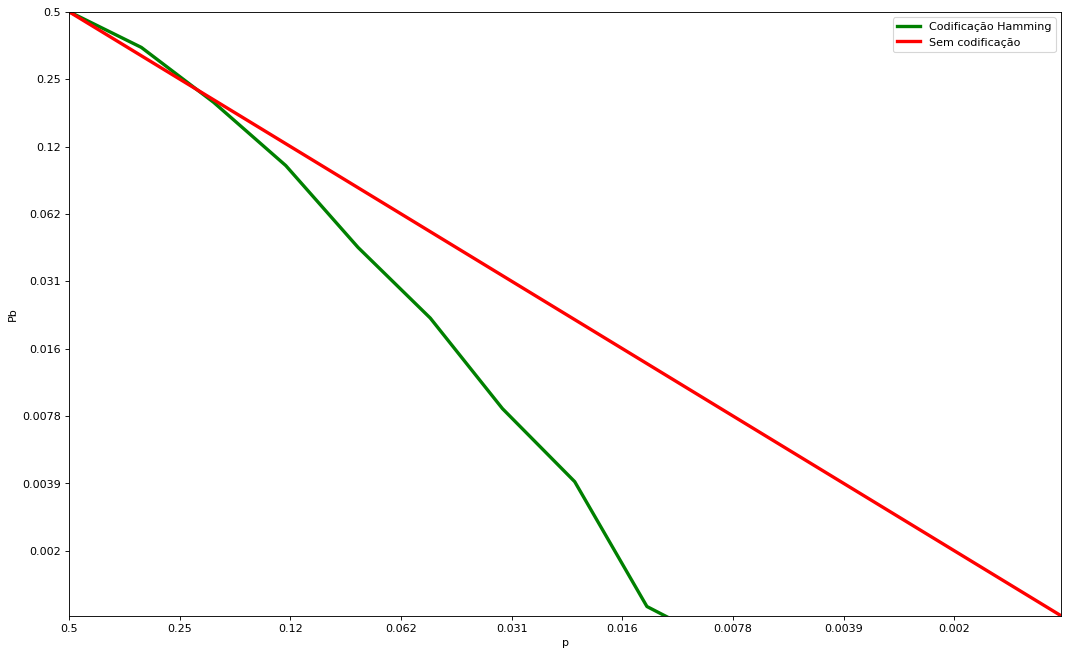

In [5]:
pb = []
p_vector = []
limit = 1e-6
i = 0.5
sticks = []
while i > 0.001:
    sticks.append(i)
    i /= 2
vp = np.logspace(math.log(0.5, 2), math.log(limit, 2), 30, base=2)
ini = time.time()
print("Initiate process:")
for p in vp:
    ini_cycle = time.time()
    p_vector.append(p)
    number_information_words = 10000
    information_word_length = 4
    # The magic happens here:
    information_words_array = bat.generate_information_words(number_information_words, information_word_length)
    codewords_array = hamming_coder.encode(information_words_array)
    transmitted_words = channel.binary_symmetric_channel(codewords_array, p)
    decoded_words = hamming_coder.decode(transmitted_words)
    pb.append(bat.compare_arrays(information_words_array, decoded_words))
    print("p = {:<10.6} (T:{:<5.4} s)".format(p, time.time() - ini_cycle))
print("Completed in {:.4}s".format(time.time() - ini))

x = np.linspace(0.5, 0, 100)
fig, ax = plt.subplots(figsize=(16,10), dpi=80)
ax.plot(p_vector, pb, label='Codificação Hamming', color='g', linewidth=3)
plt.plot(x, x, label='Sem codificação', color='r', linewidth=3)
ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
ax.set_xlim(0.5, pow(10, -3))
ax.set_ylim(pow(10, -3), 0.5)
plt.xticks(sticks, sticks)
plt.yticks(sticks, sticks)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))

plt.xlabel('p')
plt.ylabel('Pb')
ax.legend()
plt.savefig('./lab1/plots/hamming_fig_sz_{}_lim_{}.png'.format(number_information_words, limit), facecolor='white')
plt.show()

## Hamming Code With Our Code

Initiate process:
p = 0.5        (T:0.2256 s)
p = 0.31802    (T:0.266 s)
p = 0.202273   (T:0.2152 s)
p = 0.128653   (T:0.2666 s)
p = 0.0818286  (T:0.1814 s)
p = 0.0520462  (T:0.2032 s)
p = 0.0331034  (T:0.2004 s)
p = 0.0210551  (T:0.2039 s)
p = 0.0133918  (T:0.2006 s)
p = 0.00851774 (T:0.1994 s)
p = 0.00541761 (T:0.1851 s)
p = 0.00344581 (T:0.2031 s)
p = 0.00219167 (T:0.2036 s)
p = 0.00139399 (T:0.2031 s)
p = 0.000886631 (T:0.2072 s)
p = 0.000563932 (T:0.1907 s)
p = 0.000358683 (T:0.2047 s)
p = 0.000228136 (T:0.1883 s)
p = 0.000145104 (T:0.2036 s)
p = 9.22916e-05 (T:0.1874 s)
p = 5.8701e-05 (T:0.1893 s)
p = 3.73362e-05 (T:0.2049 s)
p = 2.37473e-05 (T:0.2192 s)
p = 1.51042e-05 (T:0.1953 s)
p = 9.60685e-06 (T:0.1926 s)
p = 6.11033e-06 (T:0.2053 s)
p = 3.88641e-06 (T:0.1931 s)
p = 2.47191e-06 (T:0.1959 s)
p = 1.57223e-06 (T:0.2027 s)
p = 1e-06      (T:0.1959 s)
Completed in 25.32s


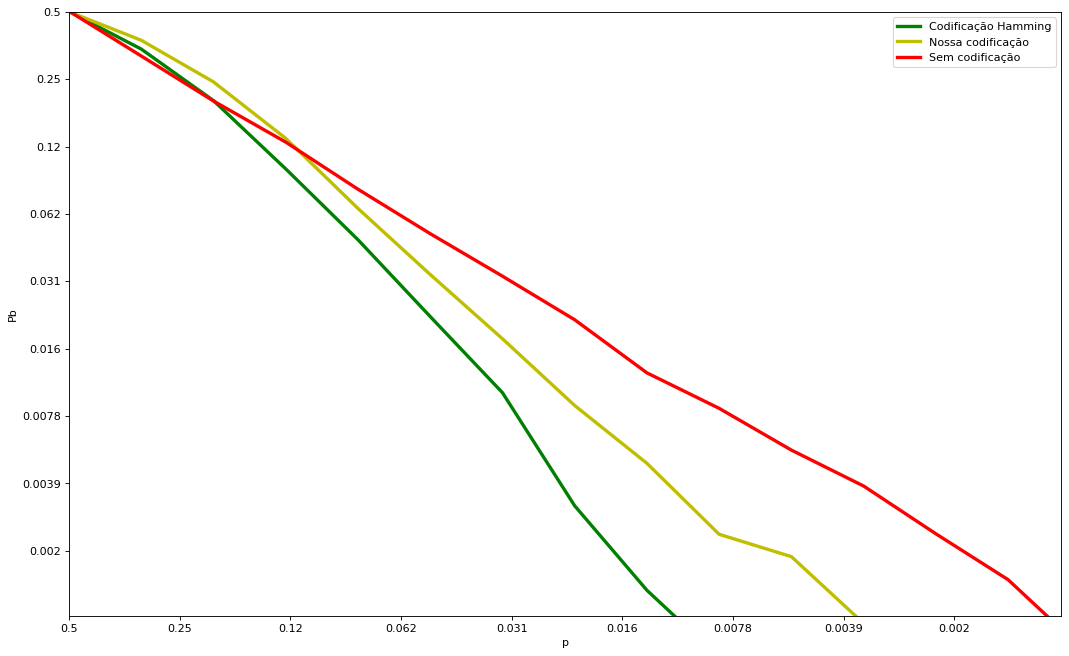

In [5]:
pb_hamming_code_vector = []
pb_our_code_vector     = []
pb_none_code_vector    = []
p_hamming_code_vector = []
p_our_code_vector     = []
p_none_code_vector    = []
limit = 1e-6
i = 0.5
sticks = []
while i > 0.001:
    sticks.append(i)
    i /= 2
vp = np.logspace(math.log(0.5, 2), math.log(limit, 2), 30, base=2)
ini = time.time()
print("Initiate process:")
hamming_code_pack = (p_hamming_code_vector, pb_hamming_code_vector, hamming_coder)
our_code_pack     = (p_our_code_vector, pb_our_code_vector, our_coder)
none_code_pack    = (p_none_code_vector, pb_none_code_vector, none_coder)
for p in vp:
    for p_vector, pb, coder in [hamming_code_pack, our_code_pack, none_code_pack]:
        ini_cycle = time.time()
        p_vector.append(p)
        number_information_words = 10000
        information_word_length = coder.information_word_length
        # The magic happens here:
        information_words_array = bat.generate_information_words(number_information_words, information_word_length)
        codewords_array = coder.encode(information_words_array)
        transmitted_words = channel.binary_symmetric_channel(codewords_array, p)
        decoded_words = coder.decode(transmitted_words)
        pb.append(bat.compare_arrays(information_words_array, decoded_words))
    print("p = {:<10.6} (T:{:<5.4} s)".format(p, time.time() - ini_cycle))
print("Completed in {:.4}s".format(time.time() - ini))

x = np.linspace(0.5, 0, 100)
fig, ax = plt.subplots(figsize=(16,10), dpi=80)
ax.plot(p_hamming_code_vector, pb_hamming_code_vector, label='Codificação Hamming', color='g', linewidth=3)
ax.plot(p_our_code_vector, pb_our_code_vector, label='Nossa codificação', color='y', linewidth=3)
ax.plot(p_none_code_vector, pb_none_code_vector, label='Sem codificação', color='r', linewidth=3)
ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
ax.set_xlim(0.5, pow(10, -3))
ax.set_ylim(pow(10, -3), 0.5)
plt.xticks(sticks, sticks)
plt.yticks(sticks, sticks)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))

plt.xlabel('p')
plt.ylabel('Pb')
ax.legend()
plt.savefig('./lab1/plots/hamming_fig_sz_{}_lim_{}.png'.format(number_information_words, limit), facecolor='white')
plt.show()

# LAB 2